***CS 452 Assignment 1 - Life Expectancy by Linear Regression***

***Author: Uygar Kaya / 14.11.2021***<br />
***Instructor: Assistant Prof. Reyhan Aydoğan***

In [1]:
# importing required libraries for this assignment

import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
# Reading data from a csv file
df = pd.read_csv('assignment-1-data.csv')

In [3]:
# Showing the first 5 row
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
# Showing the number of rows & columns
df.shape

(2938, 22)

In [5]:
# Dropping the duplicate rows if exists

df.drop_duplicates(inplace=True)
df.shape

(2938, 22)

In [6]:
# Summary of numeric features
df.describe().round(1)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.0,2928.0,2928.0,2938.0,2744.0,2938.0,2385.0,2938.0,2904.0,2938.0,2919.0,2712.0,2919.0,2938.0,2490.0,2.286000e+03,2904.0,2904.0,2771.0,2775.0
mean,2007.5,69.2,164.8,30.3,4.6,738.3,80.9,2419.6,38.3,42.0,82.6,5.9,82.3,1.7,7483.2,1.275338e+07,4.8,4.9,0.6,12.0
std,4.6,9.5,124.3,117.9,4.1,1987.9,25.1,11467.3,20.0,160.4,23.4,2.5,23.7,5.1,14270.2,6.101210e+07,4.4,4.5,0.2,3.4
min,2000.0,36.3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.4,2.0,0.1,1.7,3.400000e+01,0.1,0.1,0.0,0.0
25%,2004.0,63.1,74.0,0.0,0.9,4.7,77.0,0.0,19.3,0.0,78.0,4.3,78.0,0.1,463.9,1.957932e+05,1.6,1.5,0.5,10.1
50%,2008.0,72.1,144.0,3.0,3.8,64.9,92.0,17.0,43.5,4.0,93.0,5.8,93.0,0.1,1766.9,1.386542e+06,3.3,3.3,0.7,12.3
75%,2012.0,75.7,228.0,22.0,7.7,441.5,97.0,360.2,56.2,28.0,97.0,7.5,97.0,0.8,5910.8,7.420359e+06,7.2,7.2,0.8,14.3
max,2015.0,89.0,723.0,1800.0,17.9,19479.9,99.0,212183.0,87.3,2500.0,99.0,17.6,99.0,50.6,119172.7,1.293859e+09,27.7,28.6,0.9,20.7


In [7]:
# Knowledge of data types and whether they are null or not 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
# Checking the rows with missing values
df.isnull().sum().sort_values(ascending=False)

Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
 thinness 5-9 years                 34
 thinness  1-19 years               34
 BMI                                34
Polio                               19
Diphtheria                          19
Life expectancy                     10
Adult Mortality                     10
 HIV/AIDS                            0
Country                              0
Year                                 0
Measles                              0
percentage expenditure               0
infant deaths                        0
Status                               0
under-five deaths                    0
dtype: int64

In [9]:
# Applying the pearson correlation to find the correlation between features
df.corr(method="pearson")

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


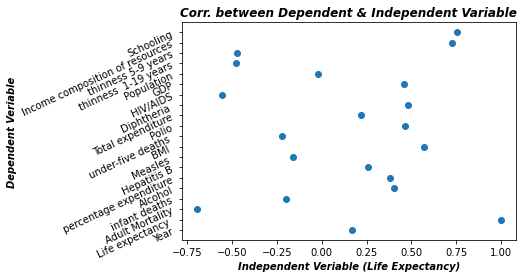

In [10]:
# Visualizing the correlation between dependent & independent variable with the help of the scatter
independentVarCorr = df.corr(method="pearson").iloc[1, :]

plt.xlabel("Independent Veriable (Life Expectancy)", fontweight="bold", style="italic")
plt.ylabel("Dependent Veriable", fontweight="bold", style="italic")
plt.yticks(rotation = 25)

plt.title("Corr. between Dependent & Independent Variable", fontweight="bold", style="italic")
plt.scatter(independentVarCorr, ["Year", "Life expectancy ", "Adult Mortality", "infant deaths", "Alcohol", 
                                 "percentage expenditure", "Hepatitis B", "Measles ", " BMI ", "under-five deaths ", "Polio", 
                                 "Total expenditure", "Diphtheria ", " HIV/AIDS", "GDP", "Population", " thinness  1-19 years", 
                                 " thinness 5-9 years", "Income composition of resources", "Schooling"])
plt.show()

<AxesSubplot:>

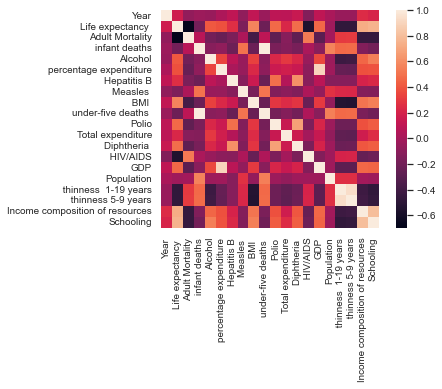

In [11]:
# Drawing a heat map for pearson correlation
sns.set(font_scale=0.9)
sns.heatmap(df.corr(method="pearson"), cbar=True, square=True)

#  *Pre-Processing of Data*

In [12]:
# Drop the 'Year', 'Measles' & 'Population' because it has very low correlation with the line Expectancy (Independent Variable)
# Drop the 'Country' because it’s just an illusion, it is not necessary to include this
# We will not include them in our training set because they are not necessary. Therefore, we will remove these features

df.drop(columns=['Country', 'Year', 'Measles ', 'Population'], inplace = True)

In [13]:
# Showing the number of rows & columns after dropping the columns 
df.shape

(2938, 18)

In [14]:
# Showing the first 5 row
df.head()

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Developing,65.0,263.0,62,0.01,71.279624,65.0,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,Developing,59.9,271.0,64,0.01,73.523582,62.0,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,Developing,59.9,268.0,66,0.01,73.219243,64.0,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,Developing,59.5,272.0,69,0.01,78.184215,67.0,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,Developing,59.2,275.0,71,0.01,7.097109,68.0,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5


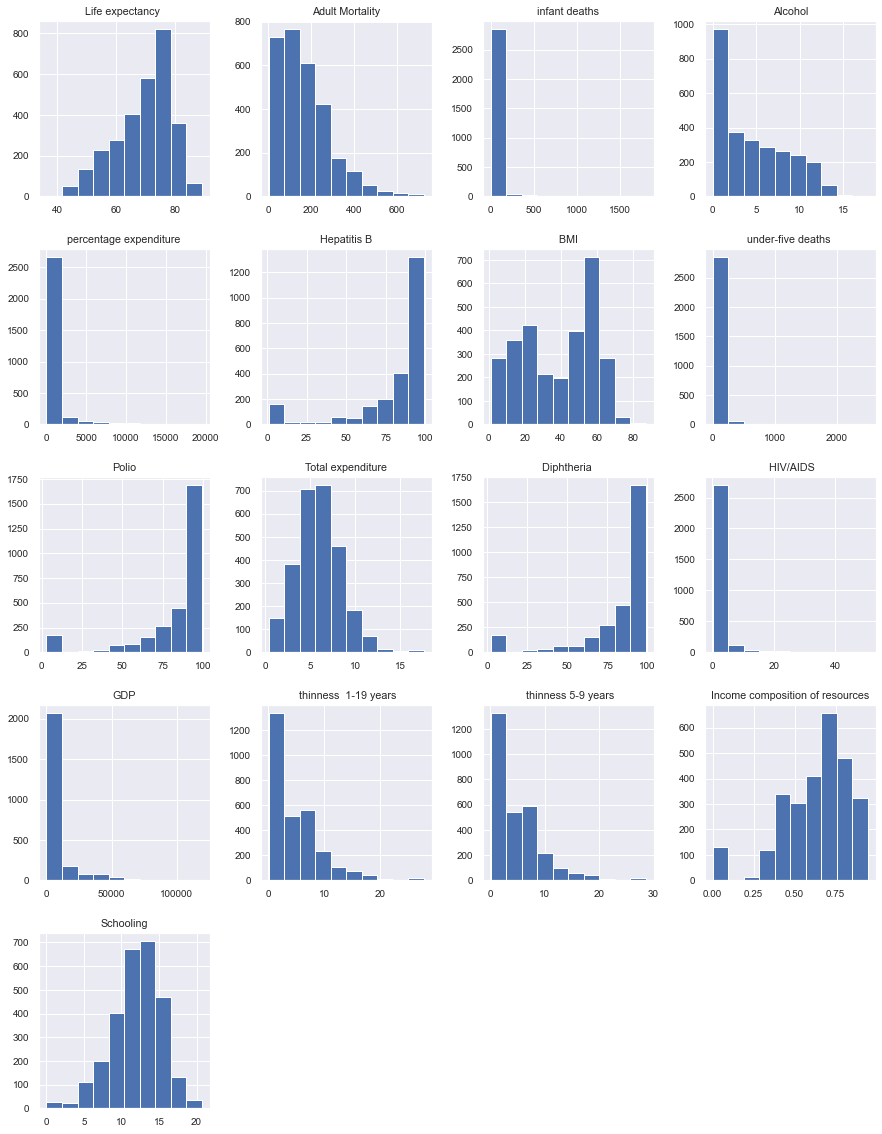

In [15]:
# Drawing a histogram for each feature
df.hist(figsize=(15,20))

# Clear the text "residue"
plt.show()

# *Dealing with Missing Values (Dropping & Imputation)*

In [16]:
# Dealing with missing values and replacing them by their mean

df["Life expectancy "].fillna(df["Life expectancy "].mean(), inplace=True)
df["Adult Mortality"].fillna(df["Adult Mortality"].mean(), inplace=True)
df["Alcohol"].fillna(df["Alcohol"].mean(), inplace=True)
df["Hepatitis B"].fillna(df["Hepatitis B"].mean(), inplace=True)
df[" BMI "].fillna(df[" BMI "].mean(), inplace=True)
df["Polio"].fillna(df["Polio"].mean(), inplace=True)
df["Total expenditure"].fillna(df["Total expenditure"].mean(), inplace=True)
df["Diphtheria "].fillna(df["Diphtheria "].mean(), inplace=True)
df["GDP"].fillna(df["GDP"].mean(), inplace=True)
df[" thinness  1-19 years"].fillna(df[" thinness  1-19 years"].mean(), inplace=True)
df[" thinness 5-9 years"].fillna(df[" thinness 5-9 years"].mean(), inplace=True)
df["Income composition of resources"].fillna(df["Income composition of resources"].mean(), inplace=True)
df["Schooling"].fillna(df["Schooling"].mean(), inplace=True)

In [17]:
# Checking the rows with missing values
# We do not expect any missing values

df.isnull().sum()

Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

# *Handling Categorical Data (One-Hot Encoding)*

In [18]:
# Applying one-hot encoding in order to convert the categorical data to numeric data

df = pd.get_dummies(df[['Status','Life expectancy ','Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 
                   'Hepatitis B', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 
                   'GDP', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']])

In [19]:
# Applying the pearson correlation to find the correlation between new features after One-Hot Encoding has been applied
df.corr(method="pearson")

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
Life expectancy,1.000000,-0.696359,-0.196535,0.391598,0.381791,0.203771,0.559255,-0.222503,0.461574,0.207981,0.475418,-0.556457,0.430493,-0.472162,-0.466629,0.692483,0.715066,0.481962,-0.481962
Adult Mortality,-0.696359,1.000000,0.078747,-0.190408,-0.242814,-0.138591,-0.381449,0.094135,-0.272694,-0.110875,-0.273014,0.523727,-0.277053,0.299863,0.305366,-0.440062,-0.435108,-0.315171,0.315171
infant deaths,-0.196535,0.078747,1.000000,-0.113812,-0.085612,-0.178783,-0.227220,0.996629,-0.170674,-0.126564,-0.175156,0.025231,-0.107109,0.465590,0.471228,-0.143663,-0.191757,-0.112252,0.112252
Alcohol,0.391598,-0.190408,-0.113812,1.000000,0.339634,0.075447,0.318070,-0.110777,0.213744,0.294898,0.215242,-0.048650,0.318591,-0.416946,-0.405881,0.416099,0.497546,0.579371,-0.579371
percentage expenditure,0.381791,-0.242814,-0.085612,0.339634,1.000000,0.011679,0.228537,-0.087852,0.147203,0.173414,0.143570,-0.097857,0.888140,-0.251190,-0.252725,0.380374,0.388105,0.454261,-0.454261
Hepatitis B,0.203771,-0.138591,-0.178783,0.075447,0.011679,1.000000,0.134929,-0.184413,0.408519,0.050084,0.499958,-0.102405,0.062318,-0.105144,-0.108334,0.150992,0.171755,0.095642,-0.095642
BMI,0.559255,-0.381449,-0.227220,0.318070,0.228537,0.134929,1.000000,-0.237586,0.282156,0.231814,0.281059,-0.243548,0.276645,-0.532025,-0.538911,0.479837,0.508105,0.310873,-0.310873
under-five deaths,-0.222503,0.094135,0.996629,-0.110777,-0.087852,-0.184413,-0.237586,1.000000,-0.188703,-0.128269,-0.195651,0.038062,-0.110640,0.467626,0.472099,-0.161533,-0.207111,-0.115195,0.115195
Polio,0.461574,-0.272694,-0.170674,0.213744,0.147203,0.408519,0.282156,-0.188703,1.000000,0.130129,0.673553,-0.159489,0.193980,-0.219938,-0.220710,0.355398,0.385832,0.220098,-0.220098
Total expenditure,0.207981,-0.110875,-0.126564,0.294898,0.173414,0.050084,0.231814,-0.128269,0.130129,1.000000,0.145597,-0.001383,0.121467,-0.268724,-0.275240,0.149095,0.218310,0.289985,-0.289985


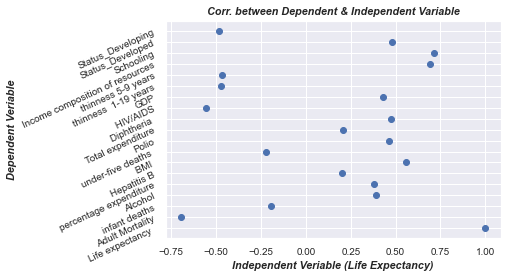

In [20]:
# Visualizing the new correlation between dependent & independent variable after One-Hot Encoding has been applied
independentVarCorrNew = df.corr(method="pearson").iloc[0, :]

plt.xlabel("Independent Veriable (Life Expectancy)", fontweight="bold", style="italic")
plt.ylabel("Dependent Veriable", fontweight="bold", style="italic")
plt.yticks(rotation = 25)

plt.title("Corr. between Dependent & Independent Variable", fontweight="bold", style="italic")
plt.scatter(independentVarCorrNew, ["Life expectancy ", "Adult Mortality", "infant deaths", "Alcohol", "percentage expenditure", 
                                    "Hepatitis B", " BMI ", "under-five deaths ", "Polio", "Total expenditure", "Diphtheria ", 
                                    " HIV/AIDS", "GDP", " thinness  1-19 years", " thinness 5-9 years", 
                                    "Income composition of resources", "Schooling", "Status_Developed", "Status_Developing"])
plt.show()

<AxesSubplot:>

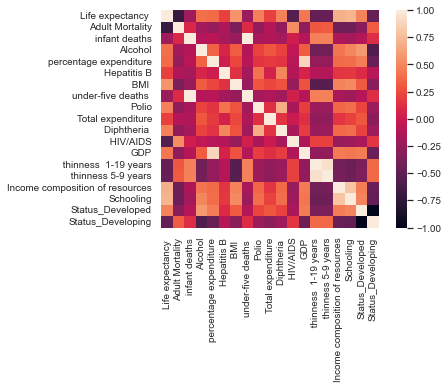

In [21]:
# Drawing a new heat map after One-Hot Encoding has been applied

sns.set(font_scale=0.9)
sns.heatmap(df.corr(method="pearson"), cbar=True, square=True)

### *Visualizing the Data for each Dependent Feature with Independent Feature*

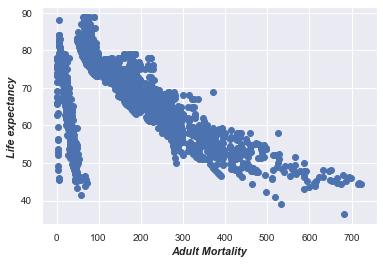

In [22]:
# Visualizing dependent & independent variable with scatter
plt.xlabel("Adult Mortality", fontweight="bold", style="italic")
plt.ylabel("Life expectancy ", fontweight="bold", style="italic")
plt.scatter(df['Adult Mortality'], df['Life expectancy '])

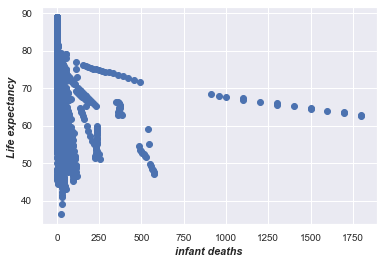

In [23]:
# Visualizing dependent & independent variable with scatter
plt.xlabel("infant deaths", fontweight="bold", style="italic")
plt.ylabel("Life expectancy ", fontweight="bold", style="italic")
plt.scatter(df['infant deaths'], df['Life expectancy '])

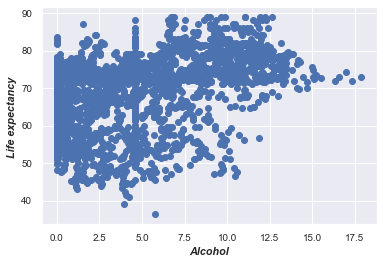

In [24]:
# Visualizing dependent & independent variable with scatter
plt.xlabel("Alcohol", fontweight="bold", style="italic")
plt.ylabel("Life expectancy ", fontweight="bold", style="italic")
plt.scatter(df['Alcohol'], df['Life expectancy '])

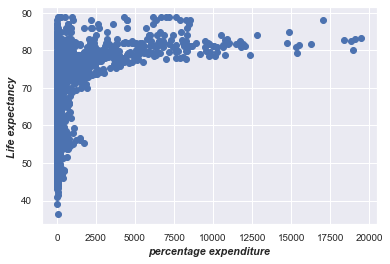

In [25]:
# Visualizing dependent & independent variable with scatter
plt.xlabel("percentage expenditure", fontweight="bold", style="italic")
plt.ylabel("Life expectancy ", fontweight="bold", style="italic")
plt.scatter(df['percentage expenditure'], df['Life expectancy '])

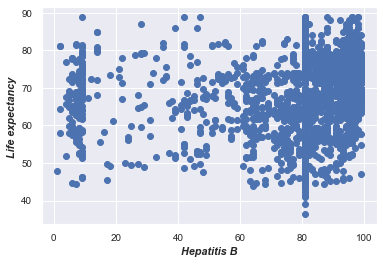

In [26]:
# Visualizing dependent & independent variable with scatter
plt.xlabel("Hepatitis B", fontweight="bold", style="italic")
plt.ylabel("Life expectancy ", fontweight="bold", style="italic")
plt.scatter(df['Hepatitis B'], df['Life expectancy '])

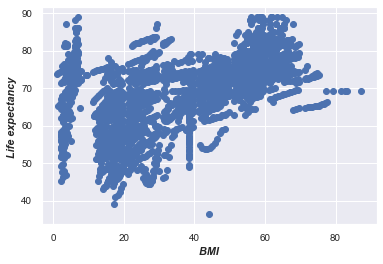

In [27]:
# Visualizing dependent & independent variable with scatter
plt.xlabel(" BMI ", fontweight="bold", style="italic")
plt.ylabel("Life expectancy ", fontweight="bold", style="italic")
plt.scatter(df[' BMI '], df['Life expectancy '])

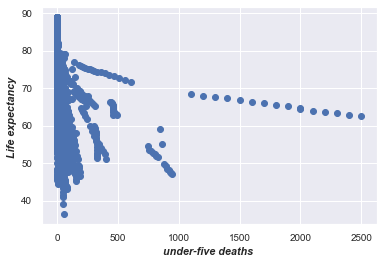

In [28]:
# Visualizing dependent & independent variable with scatter
plt.xlabel("under-five deaths ", fontweight="bold", style="italic")
plt.ylabel("Life expectancy ", fontweight="bold", style="italic")
plt.scatter(df['under-five deaths '], df['Life expectancy '])

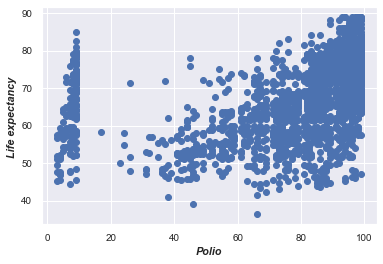

In [29]:
# Visualizing dependent & independent variable with scatter
plt.xlabel("Polio", fontweight="bold", style="italic")
plt.ylabel("Life expectancy ", fontweight="bold", style="italic")
plt.scatter(df['Polio'], df['Life expectancy '])

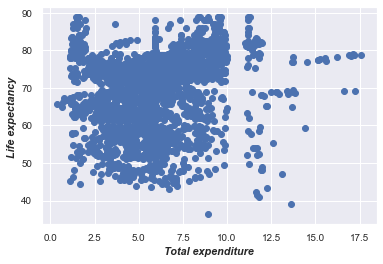

In [30]:
# Visualizing dependent & independent variable with scatter
plt.xlabel("Total expenditure", fontweight="bold", style="italic")
plt.ylabel("Life expectancy ", fontweight="bold", style="italic")
plt.scatter(df['Total expenditure'], df['Life expectancy '])

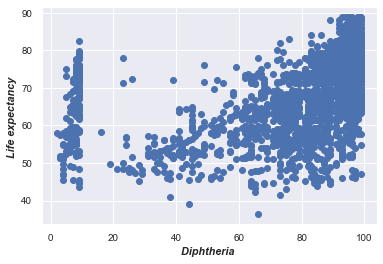

In [31]:
# Visualizing dependent & independent variable with scatter
plt.xlabel("Diphtheria ", fontweight="bold", style="italic")
plt.ylabel("Life expectancy ", fontweight="bold", style="italic")
plt.scatter(df['Diphtheria '], df['Life expectancy '])

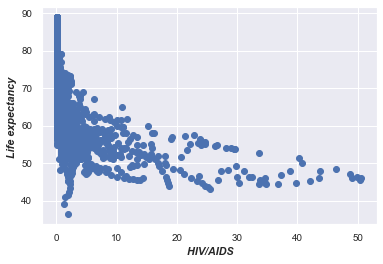

In [32]:
# Visualizing dependent & independent variable with scatter
plt.xlabel(" HIV/AIDS", fontweight="bold", style="italic")
plt.ylabel("Life expectancy ", fontweight="bold", style="italic")
plt.scatter(df[' HIV/AIDS'], df['Life expectancy '])

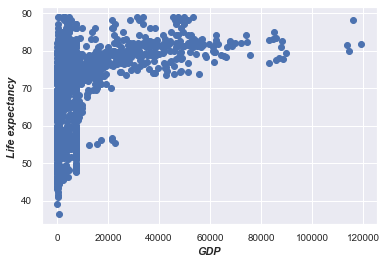

In [33]:
# Visualizing dependent & independent variable with scatter
plt.xlabel("GDP", fontweight="bold", style="italic")
plt.ylabel("Life expectancy ", fontweight="bold", style="italic")
plt.scatter(df['GDP'], df['Life expectancy '])

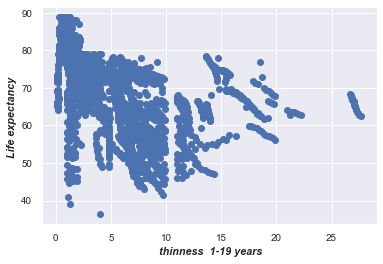

In [34]:
# Visualizing dependent & independent variable with scatter
plt.xlabel(" thinness  1-19 years", fontweight="bold", style="italic")
plt.ylabel("Life expectancy ", fontweight="bold", style="italic")
plt.scatter(df[' thinness  1-19 years'], df['Life expectancy '])

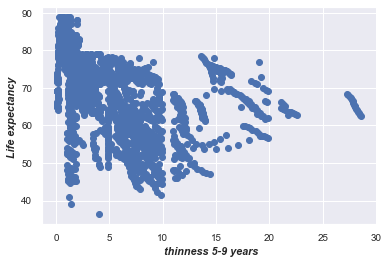

In [35]:
# Visualizing dependent & independent variable with scatter
plt.xlabel(" thinness 5-9 years", fontweight="bold", style="italic")
plt.ylabel("Life expectancy ", fontweight="bold", style="italic")
plt.scatter(df[' thinness 5-9 years'], df['Life expectancy '])

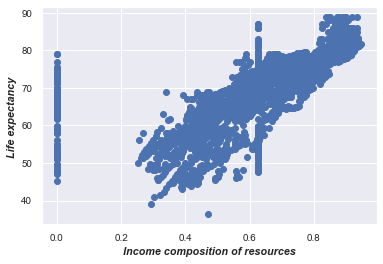

In [36]:
# Visualizing dependent & independent variable with scatter
plt.xlabel("Income composition of resources", fontweight="bold", style="italic")
plt.ylabel("Life expectancy ", fontweight="bold", style="italic")
plt.scatter(df['Income composition of resources'], df['Life expectancy '])

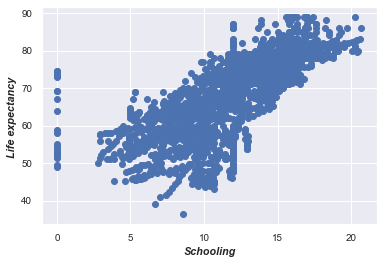

In [37]:
# Visualizing dependent & independent variable with scatter
plt.xlabel("Schooling", fontweight="bold", style="italic")
plt.ylabel("Life expectancy ", fontweight="bold", style="italic")
plt.scatter(df['Schooling'], df['Life expectancy '])

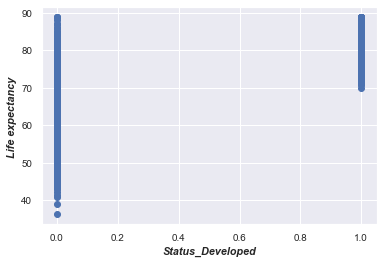

In [38]:
# Visualizing dependent & independent variable with scatter
plt.xlabel("Status_Developed", fontweight="bold", style="italic")
plt.ylabel("Life expectancy ", fontweight="bold", style="italic")
plt.scatter(df['Status_Developed'], df['Life expectancy '])

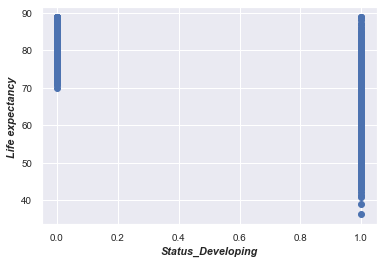

In [39]:
# Visualizing dependent & independent variable with scatter
plt.xlabel("Status_Developing", fontweight="bold", style="italic")
plt.ylabel("Life expectancy ", fontweight="bold", style="italic")
plt.scatter(df['Status_Developing'], df['Life expectancy '])

In [40]:
# See the correlation information of Dependent & Independent variables more clearly.
df.corr(method="pearson").head(1)

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
Life expectancy,1.0,-0.696359,-0.196535,0.391598,0.381791,0.203771,0.559255,-0.222503,0.461574,0.207981,0.475418,-0.556457,0.430493,-0.472162,-0.466629,0.692483,0.715066,0.481962,-0.481962


In [41]:
# Sorting the correlations between Dependent & Independent Veriable
df.corr(method="pearson").iloc[0, :].abs().sort_values(ascending = False)

Life expectancy                    1.000000
Schooling                          0.715066
Adult Mortality                    0.696359
Income composition of resources    0.692483
 BMI                               0.559255
 HIV/AIDS                          0.556457
Status_Developing                  0.481962
Status_Developed                   0.481962
Diphtheria                         0.475418
 thinness  1-19 years              0.472162
 thinness 5-9 years                0.466629
Polio                              0.461574
GDP                                0.430493
Alcohol                            0.391598
percentage expenditure             0.381791
under-five deaths                  0.222503
Total expenditure                  0.207981
Hepatitis B                        0.203771
infant deaths                      0.196535
Name: Life expectancy , dtype: float64

In [42]:
# Creating 5 different DataFrames to create 5 different experimental models
# in df1, we use all the data what we pre-process
# in df2, we use 8 different dependent variables data with the highest correlation with the independent variable 
# in df3, we use 8 different dependent variables data with the lowest correlation with the independent variable 
# in df4, we use 10 different dependent variables data that have one lowest and one highest correlation with the independent variable
# in df5, we use data with modeate and above correlation values

df1 = df
df2 = df[["Schooling", "Adult Mortality", "Income composition of resources", " BMI ", " HIV/AIDS", "Status_Developing", "Status_Developed", "Diphtheria ", "Life expectancy "]]
df3 = df[["infant deaths", "Hepatitis B", "Total expenditure", "under-five deaths ", "percentage expenditure", "Alcohol", "GDP", "Polio", "Life expectancy "]]
df4 = df[["Schooling", "infant deaths", "Adult Mortality", "Hepatitis B", "Income composition of resources", "Total expenditure", " BMI ", "under-five deaths ", " HIV/AIDS", "percentage expenditure", "Life expectancy "]]
df5 = df[["Schooling", "Adult Mortality", "Income composition of resources", " BMI ", " HIV/AIDS", "Status_Developing", "Status_Developed", "Diphtheria ", " thinness  1-19 years", " thinness 5-9 years", "Polio", "GDP", "Life expectancy "]]

### *Display the created 5 different dataframes*

In [43]:
df1.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,65.0,263.0,62,0.01,71.279624,65.0,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,0,1
1,59.9,271.0,64,0.01,73.523582,62.0,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0,0,1
2,59.9,268.0,66,0.01,73.219243,64.0,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9,0,1
3,59.5,272.0,69,0.01,78.184215,67.0,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8,0,1
4,59.2,275.0,71,0.01,7.097109,68.0,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5,0,1


In [44]:
df2.head()

,Schooling,Adult Mortality,Income composition of resources,BMI,HIV/AIDS,Status_Developing,Status_Developed,Diphtheria,Life expectancy
0,10.1,263.0,0.479,19.1,0.1,1,0,65.0,65.0
1,10.0,271.0,0.476,18.6,0.1,1,0,62.0,59.9
2,9.9,268.0,0.470,18.1,0.1,1,0,64.0,59.9
3,9.8,272.0,0.463,17.6,0.1,1,0,67.0,59.5
4,9.5,275.0,0.454,17.2,0.1,1,0,68.0,59.2


In [45]:
df3.head()

,infant deaths,Hepatitis B,Total expenditure,under-five deaths,percentage expenditure,Alcohol,GDP,Polio,Life expectancy
0,62,65.0,8.16,83,71.279624,0.01,584.259210,6.0,65.0
1,64,62.0,8.18,86,73.523582,0.01,612.696514,58.0,59.9
2,66,64.0,8.13,89,73.219243,0.01,631.744976,62.0,59.9
3,69,67.0,8.52,93,78.184215,0.01,669.959000,67.0,59.5
4,71,68.0,7.87,97,7.097109,0.01,63.537231,68.0,59.2


In [46]:
df4.head()

,Schooling,infant deaths,Adult Mortality,Hepatitis B,Income composition of resources,Total expenditure,BMI,under-five deaths,HIV/AIDS,percentage expenditure,Life expectancy
0,10.1,62,263.0,65.0,0.479,8.16,19.1,83,0.1,71.279624,65.0
1,10.0,64,271.0,62.0,0.476,8.18,18.6,86,0.1,73.523582,59.9
2,9.9,66,268.0,64.0,0.470,8.13,18.1,89,0.1,73.219243,59.9
3,9.8,69,272.0,67.0,0.463,8.52,17.6,93,0.1,78.184215,59.5
4,9.5,71,275.0,68.0,0.454,7.87,17.2,97,0.1,7.097109,59.2


In [47]:
df5.head()

,Schooling,Adult Mortality,Income composition of resources,BMI,HIV/AIDS,Status_Developing,Status_Developed,Diphtheria,thinness 1-19 years,thinness 5-9 years,Polio,GDP,Life expectancy
0,10.1,263.0,0.479,19.1,0.1,1,0,65.0,17.2,17.3,6.0,584.259210,65.0
1,10.0,271.0,0.476,18.6,0.1,1,0,62.0,17.5,17.5,58.0,612.696514,59.9
2,9.9,268.0,0.470,18.1,0.1,1,0,64.0,17.7,17.7,62.0,631.744976,59.9
3,9.8,272.0,0.463,17.6,0.1,1,0,67.0,17.9,18.0,67.0,669.959000,59.5
4,9.5,275.0,0.454,17.2,0.1,1,0,68.0,18.2,18.2,68.0,63.537231,59.2


## *Applying Linear Regression Model Strategy*

In [48]:
# Split the data to independent variables(y) and dependent variable(x) 
# Y1, Y2, Y3, Y4, Y5 is target feature that we want to make prediction on

X1 = df1.iloc[:,1:19].values
Y1 = df1.iloc[:,0].values

X2 = df2.iloc[:,0:8].values
Y2 = df2.iloc[:,-1].values

X3 = df3.iloc[:,0:8].values
Y3 = df3.iloc[:,-1].values

X4 = df4.iloc[:,0:10].values
Y4 = df4.iloc[:,-1].values

X5 = df5.iloc[:,0:12].values
Y5 = df5.iloc[:,-1].values

In [49]:
# We split the data into training and test sets

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=147)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=147)
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.2, random_state=147)
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size=0.2, random_state=147)
X5_train, X5_test, Y5_train, Y5_test = train_test_split(X5, Y5, test_size=0.2, random_state=147)

In [50]:
# We should look the X train & Y train data shape because it should be equal
x_train_shape = [X1_train.shape, X2_train.shape, X3_train.shape, X4_train.shape, X5_train.shape]
y_train_shape = [Y1_train.shape, Y2_train.shape, Y3_train.shape, Y4_train.shape, Y5_train.shape]

for inc, value in enumerate(x_train_shape):
    print("X{}_train.shape: {}".format(inc+1, value))
    print("Y{}_train.shape: {}".format(inc+1, value))
    print("")

X1_train.shape: (2350, 18)
Y1_train.shape: (2350, 18)

X2_train.shape: (2350, 8)
Y2_train.shape: (2350, 8)

X3_train.shape: (2350, 8)
Y3_train.shape: (2350, 8)

X4_train.shape: (2350, 10)
Y4_train.shape: (2350, 10)

X5_train.shape: (2350, 12)
Y5_train.shape: (2350, 12)



In [51]:
# Use min-max scaler and transform each feature accordingly. 
# We put each feature value to a certain range (in general (0,1))

scaler1 = MinMaxScaler(feature_range=(0,1))
scaler2 = MinMaxScaler(feature_range=(0,1))
scaler3 = MinMaxScaler(feature_range=(0,1))
scaler4 = MinMaxScaler(feature_range=(0,1))
scaler5 = MinMaxScaler(feature_range=(0,1))

In [52]:
# We should scale the x_train to make the standardization

scaled_X1train = scaler1.fit_transform(X1_train)
scaled_X2train = scaler2.fit_transform(X2_train)
scaled_X3train = scaler3.fit_transform(X3_train)
scaled_X4train = scaler4.fit_transform(X4_train)
scaled_X5train = scaler5.fit_transform(X5_train)

In [53]:
# initialize the linear regression model

linearRegression1 = LinearRegression()
linearRegression2 = LinearRegression()
linearRegression3 = LinearRegression()
linearRegression4 = LinearRegression()
linearRegression5 = LinearRegression()

In [54]:
# Fit the training data to the model (training)

linearRegression1.fit(scaled_X1train, Y1_train)
linearRegression2.fit(scaled_X2train, Y2_train)
linearRegression3.fit(scaled_X3train, Y3_train)
linearRegression4.fit(scaled_X4train, Y4_train)
linearRegression5.fit(scaled_X5train, Y5_train)

LinearRegression()

In [55]:
# Coefficients of the model

coef_ = [linearRegression1.coef_, linearRegression2.coef_, linearRegression3.coef_, linearRegression4.coef_, linearRegression5.coef_]

for inc, value in enumerate(coef_):
    print("Coefficient{}: {}".format(inc+1, value))
    print("")

Coefficient1: [-1.43405241e+01  1.82600646e+02  1.41288873e+00  1.78036382e+00
 -1.04799121e+00  3.64845967e+00 -1.85559925e+02  2.35636038e+00
  1.31658513e+00  3.98035878e+00 -2.37374673e+01  3.82580533e+00
 -1.52518012e+00 -1.35137033e-01  5.77064102e+00  1.28406341e+01
  1.16181271e+14  1.16181271e+14]

Coefficient2: [ 1.50063700e+01 -1.49778568e+01  6.88728475e+00  4.66976268e+00
 -2.38987332e+01  8.09317634e+13  8.09317634e+13  5.92406628e+00]

Coefficient3: [ 433.78484974    1.08222124    4.04265455 -440.77433615   -1.89879002
    9.76872754   25.10611774   10.01863806]

Coefficient4: [  16.12785574  204.50293131  -15.13286851    1.80846344    7.06407091
    2.92781851    4.39236659 -209.23803603  -23.93304774    7.74912449]

Coefficient5: [ 13.80992855 -14.61347269   6.25418347   3.80038036 -23.7706206
  -0.84591377   0.84591377   4.38023309  -3.10997574   0.37042882
   2.50229146   4.90410862]



In [56]:
# intercept of the model

intercept_ = [linearRegression1.intercept_, linearRegression2.intercept_, linearRegression3.intercept_, linearRegression4.intercept_, linearRegression5.intercept_]

for inc, value in enumerate(intercept_):
    print("Intercept{}: {}".format(inc+1, value))

Intercept1: -116181271009523.6
Intercept2: -80931763366590.23
Intercept3: 55.18564837872489
Intercept4: 55.00109726608876
Intercept5: 54.52343941216498


In [57]:
# We should scale each instance of the test set in the same way as we did the training set and just using the transform method

scaled_X1test = scaler1.transform(X1_test)
scaled_X2test = scaler2.transform(X2_test)
scaled_X3test = scaler3.transform(X3_test)
scaled_X4test = scaler4.transform(X4_test)
scaled_X5test = scaler5.transform(X5_test)

In [58]:
# Predict the values by using all test data

predict1 = linearRegression1.predict(scaled_X1test)
predict2 = linearRegression2.predict(scaled_X2test)
predict3 = linearRegression3.predict(scaled_X3test)
predict4 = linearRegression4.predict(scaled_X4test)
predict5 = linearRegression5.predict(scaled_X5test)

In [59]:
# Calculate the score of the model in the test data 
# We want to desire higher values

score1 = linearRegression1.score(scaled_X1test, Y1_test)
score2 = linearRegression2.score(scaled_X2test, Y2_test)
score3 = linearRegression3.score(scaled_X3test, Y3_test)
score4 = linearRegression4.score(scaled_X4test, Y4_test)
score5 = linearRegression5.score(scaled_X5test, Y5_test)

score = [score1, score2, score3, score4, score5]
for inc, value in enumerate(score):
    print("score{}: {}".format(inc+1, value))

score1: 0.8004115433815071
score2: 0.78333006441394
score3: 0.4367334323175648
score4: 0.7717525122198143
score5: 0.7924299173922996


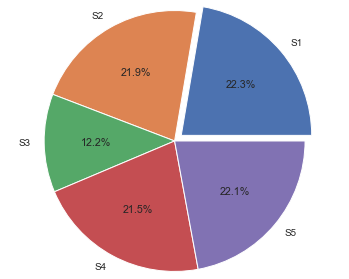

In [60]:
# Visualizing the obtained score values in a pie chart
Score_Value = [score1, score2, score3, score4, score5]
Score_Label = ['S1', 'S2', 'S3', 'S4', 'S5']

plt.axis('equal')
plt.pie(Score_Value, labels=Score_Label, radius=1.5, autopct='%0.1f%%', explode=[0.1,0,0,0,0])
plt.show()

In [61]:
# Calculate the mean squared error of the predicted values.
# We want to get lower values

MSE1 = mean_squared_error(Y1_test, predict1)
MSE2 = mean_squared_error(Y2_test, predict2)
MSE3 = mean_squared_error(Y3_test, predict3)
MSE4 = mean_squared_error(Y4_test, predict4)
MSE5 = mean_squared_error(Y5_test, predict5)

MSE = [MSE1, MSE2, MSE3, MSE4, MSE5]
for inc, value in enumerate(MSE):
    print("MSE{}: {}".format(inc+1, value))

MSE1: 18.7934490307392
MSE2: 20.401858203220733
MSE3: 53.037744315511866
MSE4: 21.492012116665354
MSE5: 19.545006930188862


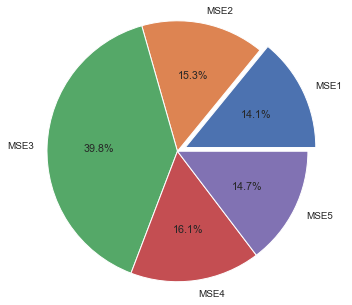

In [62]:
# Visualizing the obtained Mean Squared Error values in a pie chart
MSE_Value = [MSE1, MSE2, MSE3, MSE4, MSE5]
MSE_Label = ['MSE1', 'MSE2', 'MSE3', 'MSE4', 'MSE5']

plt.axis('equal')
plt.pie(MSE_Value, labels=MSE_Label, radius=1.5, autopct='%0.1f%%', explode=[0.1,0,0,0,0])
plt.show()

In [63]:
# Calculate the Mean Absolute Error of the predicted values

MAE1 = mean_absolute_error(Y1_test, predict1)
MAE2 = mean_absolute_error(Y2_test, predict2)
MAE3 = mean_absolute_error(Y3_test, predict3)
MAE4 = mean_absolute_error(Y4_test, predict4)
MAE5 = mean_absolute_error(Y5_test, predict5)

MAE = [MAE1, MAE2, MAE3, MAE4, MAE5]
for inc, value in enumerate(MAE):
    print("MAE{}: {}".format(inc+1, value))

MAE1: 3.2487619245102417
MAE2: 3.3427191949184047
MAE3: 5.60722306595964
MAE4: 3.417595579207909
MAE5: 3.2933439234633113


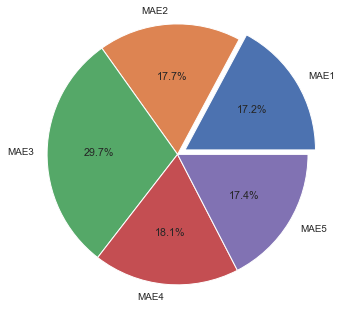

In [64]:
# Visualizing the obtained Mean Absolute Error values in a pie chart
MAE_Value = [MAE1, MAE2, MAE3, MAE4, MAE5]
MAE_Label = ['MAE1', 'MAE2', 'MAE3', 'MAE4', 'MAE5']

plt.axis('equal')
plt.pie(MAE_Value, labels=MAE_Label, radius=1.5, autopct='%0.1f%%', explode=[0.1,0,0,0,0])
plt.show()

In [65]:
# At the end of the Linear Regression, Linear Regression model 1 is the best model
# y = x1*..+x2*...+ intercept (general formula for linear regression model)

str_ = "y="
for i, m in enumerate(linearRegression1.coef_):
    str_ += "x_{}*{}+".format(i, m)

str_ += str(linearRegression1.intercept_)
print(str_)

y=x_0*-14.340524076757557+x_1*182.60064602773184+x_2*1.4128887304312627+x_3*1.7803638189019073+x_4*-1.0479912132405629+x_5*3.6484596657590185+x_6*-185.559924820483+x_7*2.3563603812518106+x_8*1.3165851323644284+x_9*3.9803587830314884+x_10*-23.73746726345896+x_11*3.825805329808659+x_12*-1.5251801240187046+x_13*-0.1351370332208018+x_14*5.7706410167703925+x_15*12.840634073581944+x_16*116181271009580.23+x_17*116181271009578.7+-116181271009523.6
